# Indicators of Anxiety and Depression Based on Reported Frequency of Symptoms

## Introduction
On March 11, 2020 the World Health Organization declared COVID-19 a pandemic. In the weeks that followed many U.S cities limited gatherings and went into lockdown to prevent the spread of the virus. Many were isolated in their homes due to sickness or limited opportunity to work. 

## Context
In April 2020, the Household Pulse Survey was created to collect data to measure household experiences during the coronavirus pandemic. The survey focuses on the mental health impact as well as socioeconomic factors. This is still an ongoing survey as of March 2022. (last gathered data on 01/10/22) 

## Objective
To explore the impact on various populations such as by age, gender, etc.

<details>
    <summary>Survey Details</summary>

##### The National Center for Health Statistics conducted this survey in 3 phases as outlined below.

        1. Phase 1 04/23/2020 - 07/21/2020
        2. Phase 2 08/19/2020 - 10/28/2020
        3. Phase 3 10/28/2020 - 12/21/2020 
        4. Phase 3 01/06/2021 - 03/29/2021
        5. Phase 3.1 04/14/2021 - 07/05/2021
        6. Phase 3.2 07/21/2021 - 10/11/2021
        7. Phase 3.3 12/01/2021 - 02/07/2022

Note: At each phase, the survey asked about the "last 7 days". Beginning in Phase 3.2, the survey asked about the "last two weeks". It is unknown why Phase 3 has been split.  
#### Survey Questions
Adapted PHQ-2 questions:

Over the last 7 days, how often have you been bothered by … having little interest or pleasure in doing things? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Over the last 7 days, how often have you been bothered by … feeling down, depressed, or hopeless? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Adapted GAD-2 questions:

Over the last 7 days, how often have you been bothered by the following problems … Feeling nervous, anxious, or on edge? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer.

Over the last 7 days, how often have you been bothered by the following problems … Not being able to stop or control worrying? Would you say not at all, several days, more than half the days, or nearly every day? Select only one answer

#### Scoring
For each scale, the answers are assigned a numerical value: not at all = 0, several days = 1, more than half the days = 2, and nearly every day = 3. The two responses for each scale are added together.

A sum equal to three or greater on the PHQ-2 has been shown to be associated with diagnoses of major depressive disorder.

A sum equal to three or greater on the GAD-2 has been shown to be associated with diagnoses of generalized anxiety disorder.
</details>

<details>
    <summary>Source </summary>
    
    - Dataset: https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp
    - How this data was used: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
</details>       


## Clean & Prepare Data

In [20]:
#import libraries

import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [21]:
#load dataset

df = pd.read_csv('AnxietyData.csv', parse_dates=['Time Period Start Date', 'Time Period End Date'])

In [22]:
#display data

df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN


In [23]:
#check for missing values

df.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      297
Low CI                     297
High CI                    297
Confidence Interval        297
Quartile Range            2862
dtype: int64

In [24]:
#groups that have missing values in the Value column

na_groups = df['Group'].unique()

na_groups

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [25]:
#create function that checks the missing values of any group 

#in the original EDA notebook, I ran a cell for each group. 
#to make this cleaner, loop through each group and output its own f-string 
 
for x in na_groups:
    def check_na_count(group):
        groupdf = df[df['Group'] == group]
        length_of_na = len(groupdf[groupdf['Value'].isna()])

        length_of_df = len(groupdf)

        na_as_percentage = round((length_of_na/length_of_df),2)

        outputstring = f"In {group} out of {length_of_df} values, there are {length_of_na} missing values. {na_as_percentage}% missing" 

        return outputstring
    check_na_count(x)
    print(check_na_count(x))

In National Estimate out of 138 values, there are 15 missing values. 0.11% missing
In By Age out of 966 values, there are 105 missing values. 0.11% missing
In By Sex out of 276 values, there are 30 missing values. 0.11% missing
In By Race/Hispanic ethnicity out of 690 values, there are 75 missing values. 0.11% missing
In By Education out of 552 values, there are 60 missing values. 0.11% missing
In By State out of 6273 values, there are 0 missing values. 0.0% missing
In By Disability status out of 96 values, there are 12 missing values. 0.12% missing
In By Gender identity out of 72 values, there are 0 missing values. 0.0% missing
In By Sexual orientation out of 72 values, there are 0 missing values. 0.0% missing


In [26]:
df['Phase'].unique()

#values are inconsistent

array(['1', '-1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1',
       '3.2', '3.3'], dtype=object)

In [27]:
#create a new column with renamed / correct Phase values (call it Phases)

#create a list of conditions
conditions = [ 
    (df['Time Period Start Date'] >= '2020-04-23') & (df['Time Period End Date'] <='2020-07-21'), #1. Phase 1   04/23/2020 - 07/21/2020
    ((df['Time Period Start Date'] >= '2020-08-19') & (df['Time Period End Date'] <='2020-10-26')), #2. Phase 2   08/19/2020 - 10/26/2020
    ((df['Time Period Start Date'] >= '2020-10-28') & (df['Time Period End Date'] <='2020-12-21')), #3. Phase 3   10/28/2020 - 12/21/2020
    ((df['Time Period Start Date'] >= '2021-01-06') & (df['Time Period End Date'] <= '2021-03-29')), #4. Phase 3 (con't) 01/06/2021 - 03/29/2021   
    ((df['Time Period Start Date'] >= '2021-04-14') & (df['Time Period End Date'] <='2021-07-05')), #5. Phase 3.1 04/14/2021 - 07/05/2021
    ((df['Time Period Start Date'] >= '2021-07-21') & (df['Time Period End Date'] <='2021-10-11')), #6. Phase 3.2 07/21/2021 - 10/11/2021
    ((df['Time Period Start Date'] >= '2021-12-01') & (df['Time Period End Date'] <='2022-02-07'))  #7 Phase 3.3 Phase 3.3 12/01/2021 - 02/07/2022
    
    ]
#create a list of the values we want to assign to each condition
values = ['Phase 1','Phase 2','Phase 3','Phase 4', 'Phase 5','Phase 6', 'Phase 7']

#create a new column and use np.select to assign values from the list as arguments
df['Phases'] = np.select(conditions, values)

#display updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


In [28]:
#display the renamed Phases
df['Phases'].unique()

array(['Phase 1', '0', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5',
       'Phase 6', 'Phase 7'], dtype=object)

In [29]:
#what is element '0' 

zero_phase_value = df[df['Phases'] == '0']

In [30]:
zero_phase_value['Time Period Start Date'].unique()

#these dates correspond to Break periods

array(['2020-07-22T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2021-03-30T00:00:00.000000000', '2021-07-06T00:00:00.000000000',
       '2021-10-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
zero_phase_value['Time Period End Date'].unique()

#these dates correspond to Break periods

array(['2020-08-18T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-07-20T00:00:00.000000000',
       '2021-11-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [32]:
#remove any rows that correspond to survey breaks

#removing unwanted rows by filtering
df = df[df['Phases'] != '0']

#display updated dataframe
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.5,22.7,24.3,22.7 - 24.3,NaN,Phase 1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1


In [33]:
#remove rows that are National Estimates

df = df[df['Group'] != 'National Estimate']

#display df
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Phases
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,32.7,30.2,35.2,30.2 - 35.2,NaN,Phase 1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.7,24.1,27.3,24.1 - 27.3,NaN,Phase 1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,24.8,23.3,26.2,23.3 - 26.2,NaN,Phase 1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.2,21.5,25.0,21.5 - 25.0,NaN,Phase 1
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,18.4,17.0,19.7,17.0 - 19.7,NaN,Phase 1


In [34]:
#create a new df with relevant columns
clean_df = df[['Indicator','State','Group', 'Subgroup','Phases', 'Time Period Label', 'Value']]

#display new df
clean_df

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4
...,...,...,...,...,...,...,...
9130,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,By State,Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",35.4
9131,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,By State,Washington,Phase 7,"Dec 29, 2021 - Jan 10, 2022",32.7
9132,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,By State,West Virginia,Phase 7,"Dec 29, 2021 - Jan 10, 2022",34.6
9133,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,By State,Wisconsin,Phase 7,"Dec 29, 2021 - Jan 10, 2022",25.5


In [35]:
#create a df pf states only (not sure if I will use yet)

states_only = clean_df[clean_df['State'] != 'United States']

#display 
states_only.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
19,Symptoms of Depressive Disorder,Alabama,By State,Alabama,Phase 1,"Apr 23 - May 5, 2020",18.6
20,Symptoms of Depressive Disorder,Alaska,By State,Alaska,Phase 1,"Apr 23 - May 5, 2020",19.2
21,Symptoms of Depressive Disorder,Arizona,By State,Arizona,Phase 1,"Apr 23 - May 5, 2020",22.4
22,Symptoms of Depressive Disorder,Arkansas,By State,Arkansas,Phase 1,"Apr 23 - May 5, 2020",26.6
23,Symptoms of Depressive Disorder,California,By State,California,Phase 1,"Apr 23 - May 5, 2020",25.4


In [36]:
#create a df filtered by United States only

us_only = clean_df[clean_df['State'] == 'United States']

#display 
us_only.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4


In [37]:
us_only['Group'].unique()

array(['By Age', 'By Sex', 'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [38]:
us_only[us_only['Group'] == 'By Age']['Subgroup'].unique()


array(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above'],
      dtype=object)

In [39]:
us_only['Subgroup'].unique()

array(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above', 'Male',
       'Female', 'Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'With disability', 'Without disability', 'Cis-gender male',
       'Cis-gender female', 'Transgender', 'Gay or lesbian', 'Straight',
       'Bisexual'], dtype=object)

In [40]:
#Define a dictionary containing the Subgroup categories


dict = {}
for group in us_only['Group'].unique():
    dict[group] = list(us_only[us_only['Group'] == group]['Subgroup'].unique())

In [41]:
subgroups_dict = dict

subgroups_dict

{'By Age': ['18 - 29 years',
  '30 - 39 years',
  '40 - 49 years',
  '50 - 59 years',
  '60 - 69 years',
  '70 - 79 years',
  '80 years and above'],
 'By Sex': ['Male', 'Female'],
 'By Race/Hispanic ethnicity': ['Hispanic or Latino',
  'Non-Hispanic White, single race',
  'Non-Hispanic Black, single race',
  'Non-Hispanic Asian, single race',
  'Non-Hispanic, other races and multiple races'],
 'By Education': ['Less than a high school diploma',
  'High school diploma or GED',
  "Some college/Associate's degree",
  "Bachelor's degree or higher"],
 'By Disability status': ['With disability', 'Without disability'],
 'By Gender identity': ['Cis-gender male', 'Cis-gender female', 'Transgender'],
 'By Sexual orientation': ['Gay or lesbian', 'Straight', 'Bisexual']}

In [42]:
#Convert dictionary to dataframe **dictionary array has different lengths**

temp = pd.DataFrame(list(subgroups_dict.values()), index = subgroups_dict.keys())

temp = temp.transpose()

subgroups_df = temp

subgroups_df

,By Age,By Sex,By Race/Hispanic ethnicity,By Education,By Disability status,By Gender identity,By Sexual orientation
0,18 - 29 years,Male,Hispanic or Latino,Less than a high school diploma,With disability,Cis-gender male,Gay or lesbian
1,30 - 39 years,Female,"Non-Hispanic White, single race",High school diploma or GED,Without disability,Cis-gender female,Straight
2,40 - 49 years,None,"Non-Hispanic Black, single race",Some college/Associate's degree,None,Transgender,Bisexual
3,50 - 59 years,None,"Non-Hispanic Asian, single race",Bachelor's degree or higher,None,None,None
4,60 - 69 years,None,"Non-Hispanic, other races and multiple races",None,None,None,None
5,70 - 79 years,None,None,None,None,None,None
6,80 years and above,None,None,None,None,None,None


In [43]:
#Merge the two dataframes
#Since us_only & subgroups_df don't share a column in common, can I do and IF LOOP? 

#example
#if value in us_only df ['subgroup'] matches the value of subgroups_df 
#then .append() a column with its values to the us_only df 


## Create df for each phase

In [44]:
#create df for each Phase 

#create a list of phases
phases_list = []

for phase in us_only['Phases'].unique().tolist():
    if phase not in phases_list:
        phases_list.append(phase)

#create a list of dataframes
phases_df = [] 
for phase in phases_list:
    us_only_df = us_only[us_only['Phases'] == phase]
    phases_df.append(us_only_df)

In [45]:
#call on the first dataframe; this should output Phase 1 only

phases_df[0].head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
1,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 1,"Apr 23 - May 5, 2020",32.7
2,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 1,"Apr 23 - May 5, 2020",25.7
3,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 1,"Apr 23 - May 5, 2020",24.8
4,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 1,"Apr 23 - May 5, 2020",23.2
5,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 1,"Apr 23 - May 5, 2020",18.4


In [46]:
# #create bar chart that breaks down by age group

# #prepare the data to plot
# ages = phase1df_age['Subgroup']
# percent = phase1df_age['Value']

# #create bar chart
# plt.bar(ages, percent, color= ('b', 'g', 'r', 'c', 'm', 'y','w'))

# #adjust labels
# plt.title('Percentage of people showing symptoms in Phase 1')
# plt.xlabel('Age Ranges')
# plt.xticks(rotation= 55)
# plt.ylabel('Percentage')
# plt.show()

In [53]:
#enter the number of the phase
phases_df[3]


#pull symptoms for depression only 
depression = phases_df[3][phases_df[3]['Indicator'] == 'Symptoms of Depressive Disorder']

depression.head()

,Indicator,State,Group,Subgroup,Phases,Time Period Label,Value
4487,Symptoms of Depressive Disorder,United States,By Age,18 - 29 years,Phase 4,"Jan 6 - Jan 18, 2021",41.1
4488,Symptoms of Depressive Disorder,United States,By Age,30 - 39 years,Phase 4,"Jan 6 - Jan 18, 2021",31.9
4489,Symptoms of Depressive Disorder,United States,By Age,40 - 49 years,Phase 4,"Jan 6 - Jan 18, 2021",29.1
4490,Symptoms of Depressive Disorder,United States,By Age,50 - 59 years,Phase 4,"Jan 6 - Jan 18, 2021",27.1
4491,Symptoms of Depressive Disorder,United States,By Age,60 - 69 years,Phase 4,"Jan 6 - Jan 18, 2021",22.3


## cleaned up visualization code

In [85]:
sub_array = depression['Subgroup'].unique()

In [94]:
sub_array = sub_array[0:7].tolist()

In [104]:
percent = depression['Value'].tolist()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

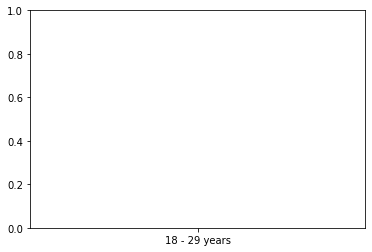

In [107]:
#prepare the data to plot
age_groups = sub_array
percentage = percent

#create bar chart
plt.bar(age_groups, percentage)

#adjust labels
plt.title('TITLE')
plt.xlabel('AGES')
plt.xticks(rotation= 90)
plt.ylabel('Percent')

#show plot
plt.show()